# Ingeniería de Características para Modelado Predictivo

El notebook presente tiene como objetivo transformar el dataset limpio (`data/processed/global_energy_consumption_clean.csv`) mediante la creación de nuevas características que capturen relaciones complejas, mejoren la capacidad predictiva y faciliten la interpretabilidad.

# Índice

1. [Configuraciones del Entorno de Trabajo y Rutas](#1-configuraciones-del-entorno-de-trabajo-y-rutas)

2. [Generación de Características: Tasas de Crecimiento, Ratios Energéticos y Variables Temporales](#2-generación-de-características-tasas-de-crecimiento-ratios-energéticos-y-variables-temporales)

    * [Creación de Tasas de Crecimiento Anual](#21-creación-de-tasas-de-crecimiento-anual)
    * [Creación de Ratios Energéticos](#22-creación-de-ratios-energéticos)

3. [Visualización de las Nuevas Características ](#3-visualización-de-las-nuevas-características)

4. [Estandarización y Normalización de Variables.](#4-estandarización-y-normalización-de-variables)

## 1. Configuraciones del Entorno de Trabajo y Rutas

* Importación de Librerias

In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import RobustScaler

* Importación de Funciones Personalizadas

In [4]:
import sys
import os
sys.path.append(os.path.abspath('..'))
import src.ingenieria_caracteristicas as ic
import src.preprocesamiento as pre
import src.visualizacion as vis

* Configuración Global

In [26]:
# Configración de Pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:,.4f}'.format)
pd.set_option('display.max_rows', 50)

# Configuación de NumPy
np.set_printoptions(precision=2, suppress=True)

# Configuración de Scikit-learn
scaler = RobustScaler()

* Rutas

In [6]:
raw_path = os.path.join('..', 'data', 'original', 'global_energy_consumption.csv')
data_path = os.path.join('..', 'data', 'procesados', 'global_energy_consumption_clean.csv')
output_data = os.path.join('..', 'data', 'procesados', 'global_energy_consumption_features.csv')

* Cargando Base de Datos Original

In [7]:
df = pre.cargar_datos(raw_path)

* Cargando Base de Datos Limpia

In [8]:
df_clean = pre.cargar_datos(data_path)

* Inspección Inicial

In [9]:
print("Dimensiones del dataset:", df_clean.shape)

Dimensiones del dataset: (10000, 20)


In [10]:
print("\nTipos de datos:\n", df_clean.dtypes)


Tipos de datos:
 Country                             object
Year                                 int64
Total Energy Consumption (TWh)     float64
Per Capita Energy Use (kWh)        float64
Renewable Energy Share (%)         float64
Fossil Fuel Dependency (%)         float64
Carbon Emissions (Million Tons)    float64
Energy Price Index (USD/kWh)       float64
Industrial Energy Use (%)          float64
Household Energy Use (%)           float64
Country_Australia                  float64
Country_Brazil                     float64
Country_Canada                     float64
Country_China                      float64
Country_Germany                    float64
Country_India                      float64
Country_Japan                      float64
Country_Russia                     float64
Country_UK                         float64
Country_USA                        float64
dtype: object


In [11]:
print("\nPrimeras filas:\n", df_clean.head())


Primeras filas:
    Country  Year  Total Energy Consumption (TWh)  Per Capita Energy Use (kWh)  \
0   Canada  2018                          1.5386                       1.2152   
1  Germany  2020                          0.9757                       0.8139   
2   Russia  2002                          0.5222                       1.1707   
3   Brazil  2010                          1.2068                      -0.9905   
4   Canada  2006                         -1.5073                       0.5034   

   Renewable Energy Share (%)  Fossil Fuel Dependency (%)  \
0                     -1.3666                      1.2641   
1                     -0.5566                     -0.1477   
2                     -1.4837                     -0.2778   
3                      1.0534                     -1.3970   
4                      1.0681                      1.4814   

   Carbon Emissions (Million Tons)  Energy Price Index (USD/kWh)  \
0                           0.8637                       -1.

In [12]:
print("\nValores faltantes:\n", df_clean.isnull().sum())


Valores faltantes:
 Country                            0
Year                               0
Total Energy Consumption (TWh)     0
Per Capita Energy Use (kWh)        0
Renewable Energy Share (%)         0
Fossil Fuel Dependency (%)         0
Carbon Emissions (Million Tons)    0
Energy Price Index (USD/kWh)       0
Industrial Energy Use (%)          0
Household Energy Use (%)           0
Country_Australia                  0
Country_Brazil                     0
Country_Canada                     0
Country_China                      0
Country_Germany                    0
Country_India                      0
Country_Japan                      0
Country_Russia                     0
Country_UK                         0
Country_USA                        0
dtype: int64


In [13]:
print("\nFilas duplicadas:", df_clean.duplicated().sum())


Filas duplicadas: 0


## 2. Generación de Características: Tasas de Crecimiento, Ratios Energéticos y Variables Temporales

### 2.1. Creación de Tasas de Crecimiento Anual

En esta sub-sección se pretende carcular tasas de crecimiento anual para variables clave, agrupadas por país. Lo que permite capturar la dinámica de crecimiento de cada país en el período analizado.

In [14]:
# Calcular tasas de crecimiento anual para variables seleccionadas
columnas_tasa_anual = ['Total Energy Consumption (TWh)', 'Per Capita Energy Use (kWh)', 'Carbon Emissions (Million Tons)']

df = ic.calcular_tasas_crecimiento_anual(df,columnas_tasa_anual, 'Country', 'Year')

# Verificar nuevas columnas
df.iloc[:, -3:].head(10)

,Tasa Anual Total Energy Consumption (TWh),Tasa Anual Per Capita Energy Use (kWh),Tasa Anual Carbon Emissions (Million Tons)
108,0.0000,0.0000,0.0000
554,-32.4213,7.7301,75.1905
729,-12.2785,-22.2072,-87.9596
1027,-25.7895,-9.7774,-75.0920
1420,-58.3519,42.8680,"2,326.1289"
1500,-13.2129,-34.0897,15.4474
1538,-45.9369,-89.4536,-21.5103
1599,36.1122,"1,433.4432",-61.1933
1605,433.5451,25.0566,172.7894
1711,56.6243,4.9893,17.7938


### 2.2. Creación de Ratios Energéticos

Se calculan los ratios que representen relaciones entre variables energéticas, con lo que se pretende evaluar el progreso, identificar patrones y fundamentar desiciones respecto de los diferentes grupos de paises que se formaran en este estudio.

In [15]:
# Ratio renovables vs. fósiles (Composición de la matriz energética)
df['renewable_fossil_ratio'] = df['Renewable Energy Share (%)'] / df['Fossil Fuel Dependency (%)']

# Eficiencia energética (Eficiencia de la matriz energética)
df['energy_efficiency'] = df['Total Energy Consumption (TWh)'] / df['Carbon Emissions (Million Tons)']

# Dependencia de combustibles fósiles (Participación fósil sobre total renovable + fósil)
df['fossil_total_ratio'] = df['Fossil Fuel Dependency (%)'] / (df['Fossil Fuel Dependency (%)'] + df['Renewable Energy Share (%)'])

# Costos de las emisiones de carbono (Precio de la energía sobre emisiones de carbono)
df['price_emissions_ratio'] = df['Energy Price Index (USD/kWh)'] / df['Carbon Emissions (Million Tons)']

df[['renewable_fossil_ratio', 'energy_efficiency', 'fossil_total_ratio', 'price_emissions_ratio']].head(15)

,renewable_fossil_ratio,energy_efficiency,fossil_total_ratio,price_emissions_ratio
108,0.7620,2.1182,0.5675,0.0001
554,0.8716,0.8171,0.5343,0.0001
729,0.7810,5.9528,0.5615,0.0006
1027,2.3674,17.7358,0.2970,0.0011
1420,2.6044,0.3045,0.2774,0.0001
1500,0.4284,0.2289,0.7001,0.0001
1538,0.3369,0.1576,0.7480,0.0001
1599,1.6561,0.5529,0.3765,0.0003
1605,0.1420,1.0815,0.8757,0.0001
1711,0.9525,1.4380,0.5122,0.0000


## 3. Visualización de las Nuevas Características 

Dado que se han generado nuevas columnas con las caracteristicas del dataset original, se puede visualizar la información de las nuevas columnas para entender mejor la información que se ha generado.

In [16]:
columnas = ['renewable_fossil_ratio', 'energy_efficiency', 'fossil_total_ratio', 'price_emissions_ratio']

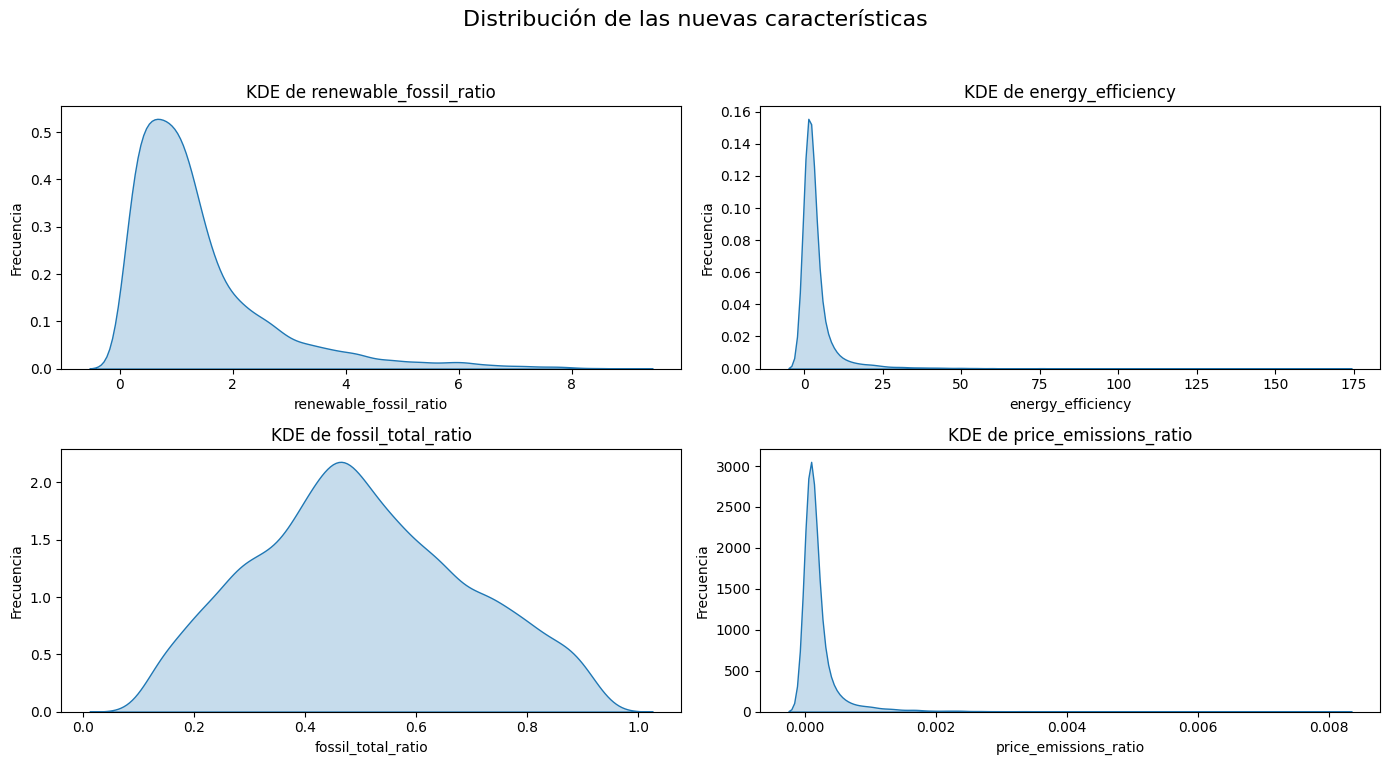

In [17]:
vis.crear_kde_multiples(df, columnas, "Distribución de las nuevas características")

In [18]:
for col in df.columns[0:26+1]:
    minimo = df[col].min()
    maximo = df[col].max()
    print(f"Máximo/mínimo de {col}: {maximo} / {minimo}")

Máximo/mínimo de Country: USA / Australia
Máximo/mínimo de Year: 2024 / 2000
Máximo/mínimo de Total Energy Consumption (TWh): 9999.26 / 100.48
Máximo/mínimo de Per Capita Energy Use (kWh): 49989.57 / 500.27
Máximo/mínimo de Renewable Energy Share (%): 90.0 / 5.0
Máximo/mínimo de Fossil Fuel Dependency (%): 80.0 / 10.01
Máximo/mínimo de Industrial Energy Use (%): 60.0 / 20.0
Máximo/mínimo de Household Energy Use (%): 40.0 / 10.0
Máximo/mínimo de Carbon Emissions (Million Tons): 4999.34 / 50.64
Máximo/mínimo de Energy Price Index (USD/kWh): 0.5 / 0.05
Máximo/mínimo de Tasa Anual Total Energy Consumption (TWh): 8971.125478054999 / -98.93003859403736
Máximo/mínimo de Tasa Anual Per Capita Energy Use (kWh): 8876.31279109281 / -98.90661676076888
Máximo/mínimo de Tasa Anual Carbon Emissions (Million Tons): 8185.993595145794 / -98.89756881068847
Máximo/mínimo de renewable_fossil_ratio: 8.82751744765703 / 0.06787698143882942
Máximo/mínimo de energy_efficiency: 169.37646652864044 / 0.02113354712

In [19]:
vis.crear_box_plot_interactivo(df, 'Country', columnas, 'Año', 'Metricas_derivadas')

**Hallazgo Clave:** 

Tal como se evidencia en ambas gráficas [Gráfica de cajas y bigotes de las métricas derivadas](../outputs/html/grafico_lineas_interactivo_Metricas_derivadas_.html) y [Gráfica KDE de métricas derivadas](../outputs/figuras/kdes_Distribución%20de%20las%20nuevas%20características_.png) existen mucho outliers en las nuevas métricas. Sin embargo, dado que muchos de esos outliers reflejan saltos reales en el comportamiento de las variables (crisis energéticas, cambios de política, fenómenos puntuales), no los descartaremos. En lugar de eliminarlos, podemos optar por técnicas que reduzcan su impacto como por ejemplo `RobusScaler` evitando perder información relevante. Por tanto, mantenemos todas las métricas derivadas en el análisis, pues sus valores extremos documentan la volatilidad y proporcionan información valiosa sobre eventos energéticos reales.

## 4. Estandarización y Normalización de Variables.

* Aplicar RobustScaler a Métricas Derivadas

In [20]:
columnas = ['Tasa Anual Total Energy Consumption (TWh)', 'Tasa Anual Per Capita Energy Use (kWh)', 
            'Tasa Anual Carbon Emissions (Million Tons)', 'renewable_fossil_ratio', 'energy_efficiency', 
            'fossil_total_ratio', 'price_emissions_ratio']

df_base = df[columnas].copy()

df_escalados = pre.estandarizacion(df_base, columnas,scaler)

* Combinar con el DataFrame Limpio

In [21]:
# Agregando las columnas nuevas escaladas al dataset limpio
for i in columnas:
    df_clean[i] = df_escalados[i]

df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 27 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country                                     10000 non-null  object 
 1   Year                                        10000 non-null  int64  
 2   Total Energy Consumption (TWh)              10000 non-null  float64
 3   Per Capita Energy Use (kWh)                 10000 non-null  float64
 4   Renewable Energy Share (%)                  10000 non-null  float64
 5   Fossil Fuel Dependency (%)                  10000 non-null  float64
 6   Carbon Emissions (Million Tons)             10000 non-null  float64
 7   Energy Price Index (USD/kWh)                10000 non-null  float64
 8   Industrial Energy Use (%)                   10000 non-null  float64
 9   Household Energy Use (%)                    10000 non-null  float64
 10  Country_Aus

In [22]:
for col in df_clean.columns[0:27+1]:
    minimo = df_clean[col].min()
    maximo = df_clean[col].max()
    print(f"Máximo/mínimo de {col}: {maximo} / {minimo}")
    

Máximo/mínimo de Country: USA / Australia
Máximo/mínimo de Year: 2024 / 2000
Máximo/mínimo de Total Energy Consumption (TWh): 1.7049342835524928 / -1.7700147073246515
Máximo/mínimo de Per Capita Energy Use (kWh): 1.7564033150618568 / -1.7275444315494264
Máximo/mínimo de Renewable Energy Share (%): 1.734661580688255 / -1.7202667235242917
Máximo/mínimo de Fossil Fuel Dependency (%): 1.7358436965306894 / -1.728700863969023
Máximo/mínimo de Carbon Emissions (Million Tons): 1.729728528184555 / -1.745399513702884
Máximo/mínimo de Energy Price Index (USD/kWh): 1.7322349959823284 / -1.7087749548067266
Máximo/mínimo de Industrial Energy Use (%): 1.7283848852121548 / -1.7383665292221655
Máximo/mínimo de Household Energy Use (%): 1.7398412971130552 / -1.749912727227302
Máximo/mínimo de Country_Australia: 1.0 / 0.0
Máximo/mínimo de Country_Brazil: 1.0 / 0.0
Máximo/mínimo de Country_Canada: 1.0 / 0.0
Máximo/mínimo de Country_China: 1.0 / 0.0
Máximo/mínimo de Country_Germany: 1.0 / 0.0
Máximo/mínimo

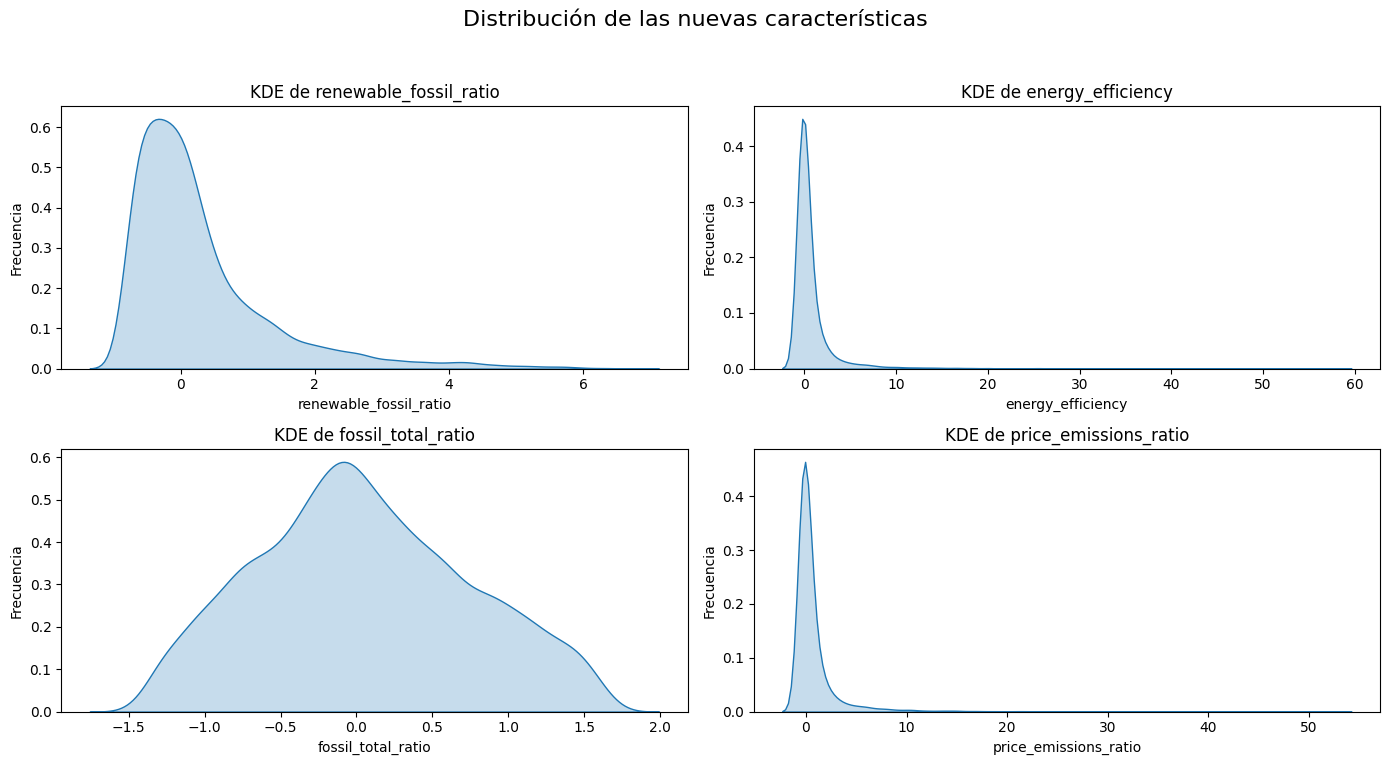

In [23]:
columnas = ['renewable_fossil_ratio', 'energy_efficiency', 
            'fossil_total_ratio', 'price_emissions_ratio']

vis.crear_kde_multiples(df_clean, columnas, "Distribución de las nuevas características")

* Guardando DataFrame con las Nuevas Métricas

In [24]:
pre.guardar_dataframe(df_clean, output_data)

DataFrame guardado en ..\data\procesados\global_energy_consumption_features.csv
